#EDA on U.S. International Air Traffic data(1990-2020)
by Isaac Martin

In [2]:
from google.colab import files
files.upload()

{}

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
sns.set(rc={"figure.dpi":400})#resolution is set to 400dpi for better visualization

In [1]:
!wget https://raw.githubusercontent.com/issac5693/Exploratory-Data-Analysis/main/Dataset/U.S%20international%20air%20traffic/International_Report_Departures.csv

--2022-09-26 15:47:18--  https://raw.githubusercontent.com/issac5693/Exploratory-Data-Analysis/main/Dataset/U.S%20international%20air%20traffic/International_Report_Departures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69545679 (66M) [text/plain]
Saving to: ‘International_Report_Departures.csv’

International_Repor 100%[===================>]  66.32M   173MB/s    in 0.4s    

2022-09-26 15:47:19 (173 MB/s) - ‘International_Report_Departures.csv’ saved [69545679/69545679]



In [5]:
!wget https://raw.githubusercontent.com/issac5693/Exploratory-Data-Analysis/main/Dataset/U.S%20international%20air%20traffic/International_Report_Passengers.csv

--2022-09-26 15:47:44--  https://raw.githubusercontent.com/issac5693/Exploratory-Data-Analysis/main/Dataset/U.S%20international%20air%20traffic/International_Report_Passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53729995 (51M) [text/plain]
Saving to: ‘International_Report_Passengers.csv’

International_Repor 100%[===================>]  51.24M   166MB/s    in 0.3s    

2022-09-26 15:47:45 (166 MB/s) - ‘International_Report_Passengers.csv’ saved [53729995/53729995]



In [6]:
df_dp=pd.read_csv('International_Report_Departures.csv')
df_ps=pd.read_csv('International_Report_Passengers.csv')

In [7]:
df_dp.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [8]:
df_ps.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

In [9]:
(df_dp.Year.unique())

array([2006, 2003, 2007, 2004, 2009, 2002, 2008, 2001, 2005, 2010, 2012,
       2011, 2013, 2015, 2016, 1996, 1995, 1999, 1998, 1990, 1994, 1997,
       1993, 1992, 1991, 2000, 2014, 2017, 2018, 2019, 2020])

In [11]:
df_dp_fill=df_dp.dropna(axis=0)

In [37]:
df_ps_fill=df_ps.dropna(axis=0)

In [12]:
df_dp_fill.isnull().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [38]:
df_ps_fill.isnull().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

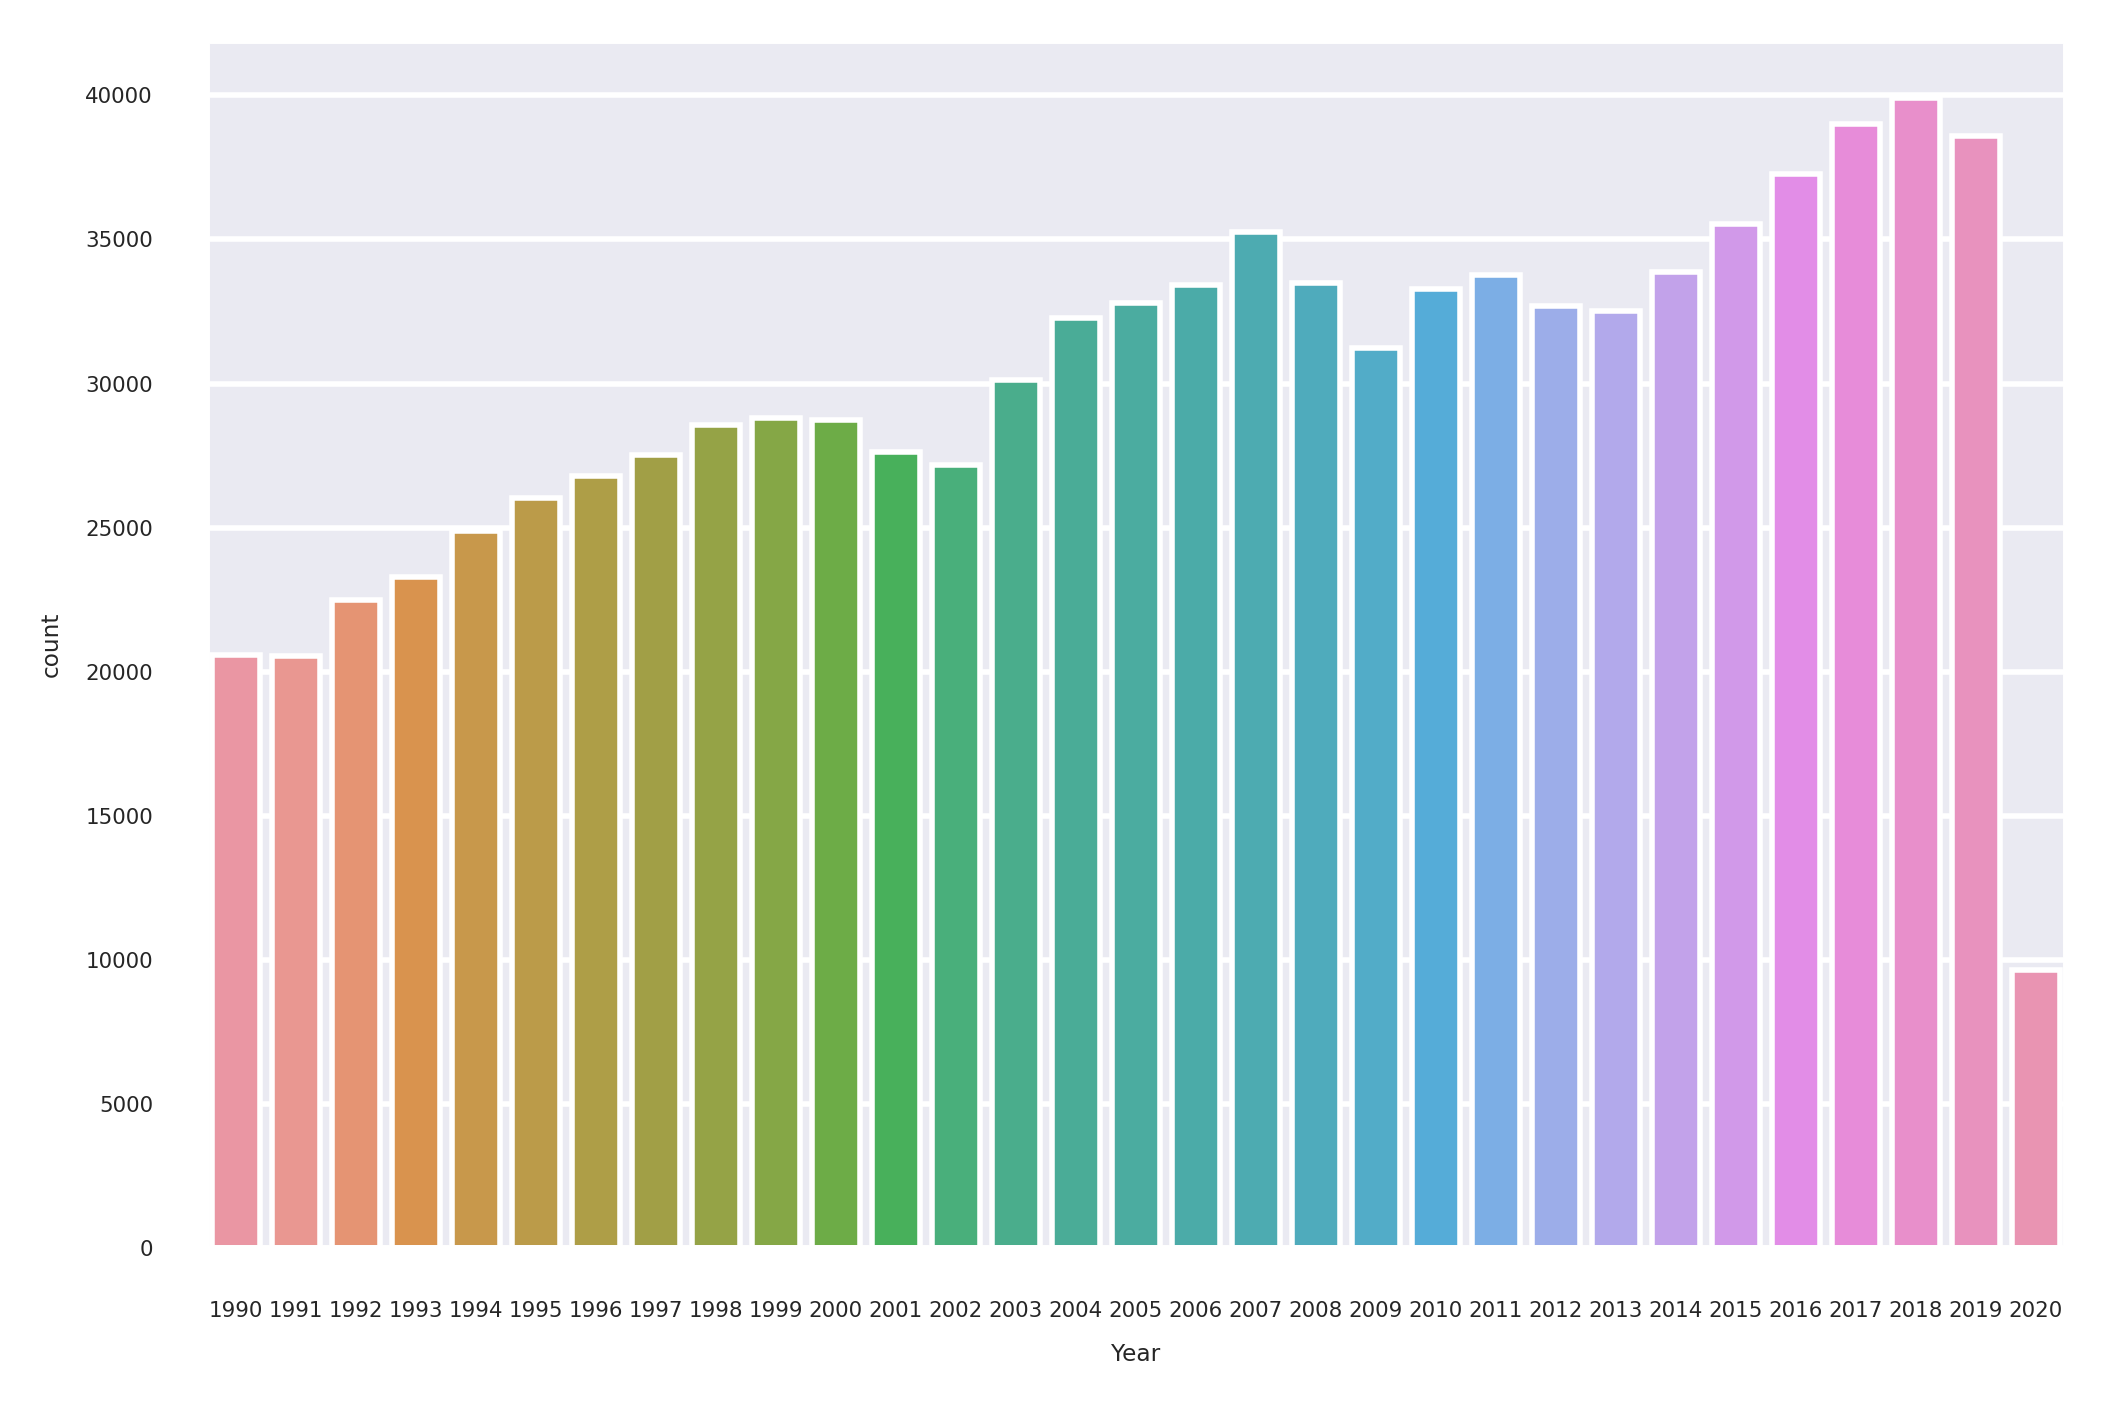

In [39]:
sns.set(font_scale = 0.35)#font scale is set to 0.3 for better tick label visibility
sns.countplot(x='Year',data=df_dp_fill,)


From the above countchart it can be seen that maximum departures are in the year 2008

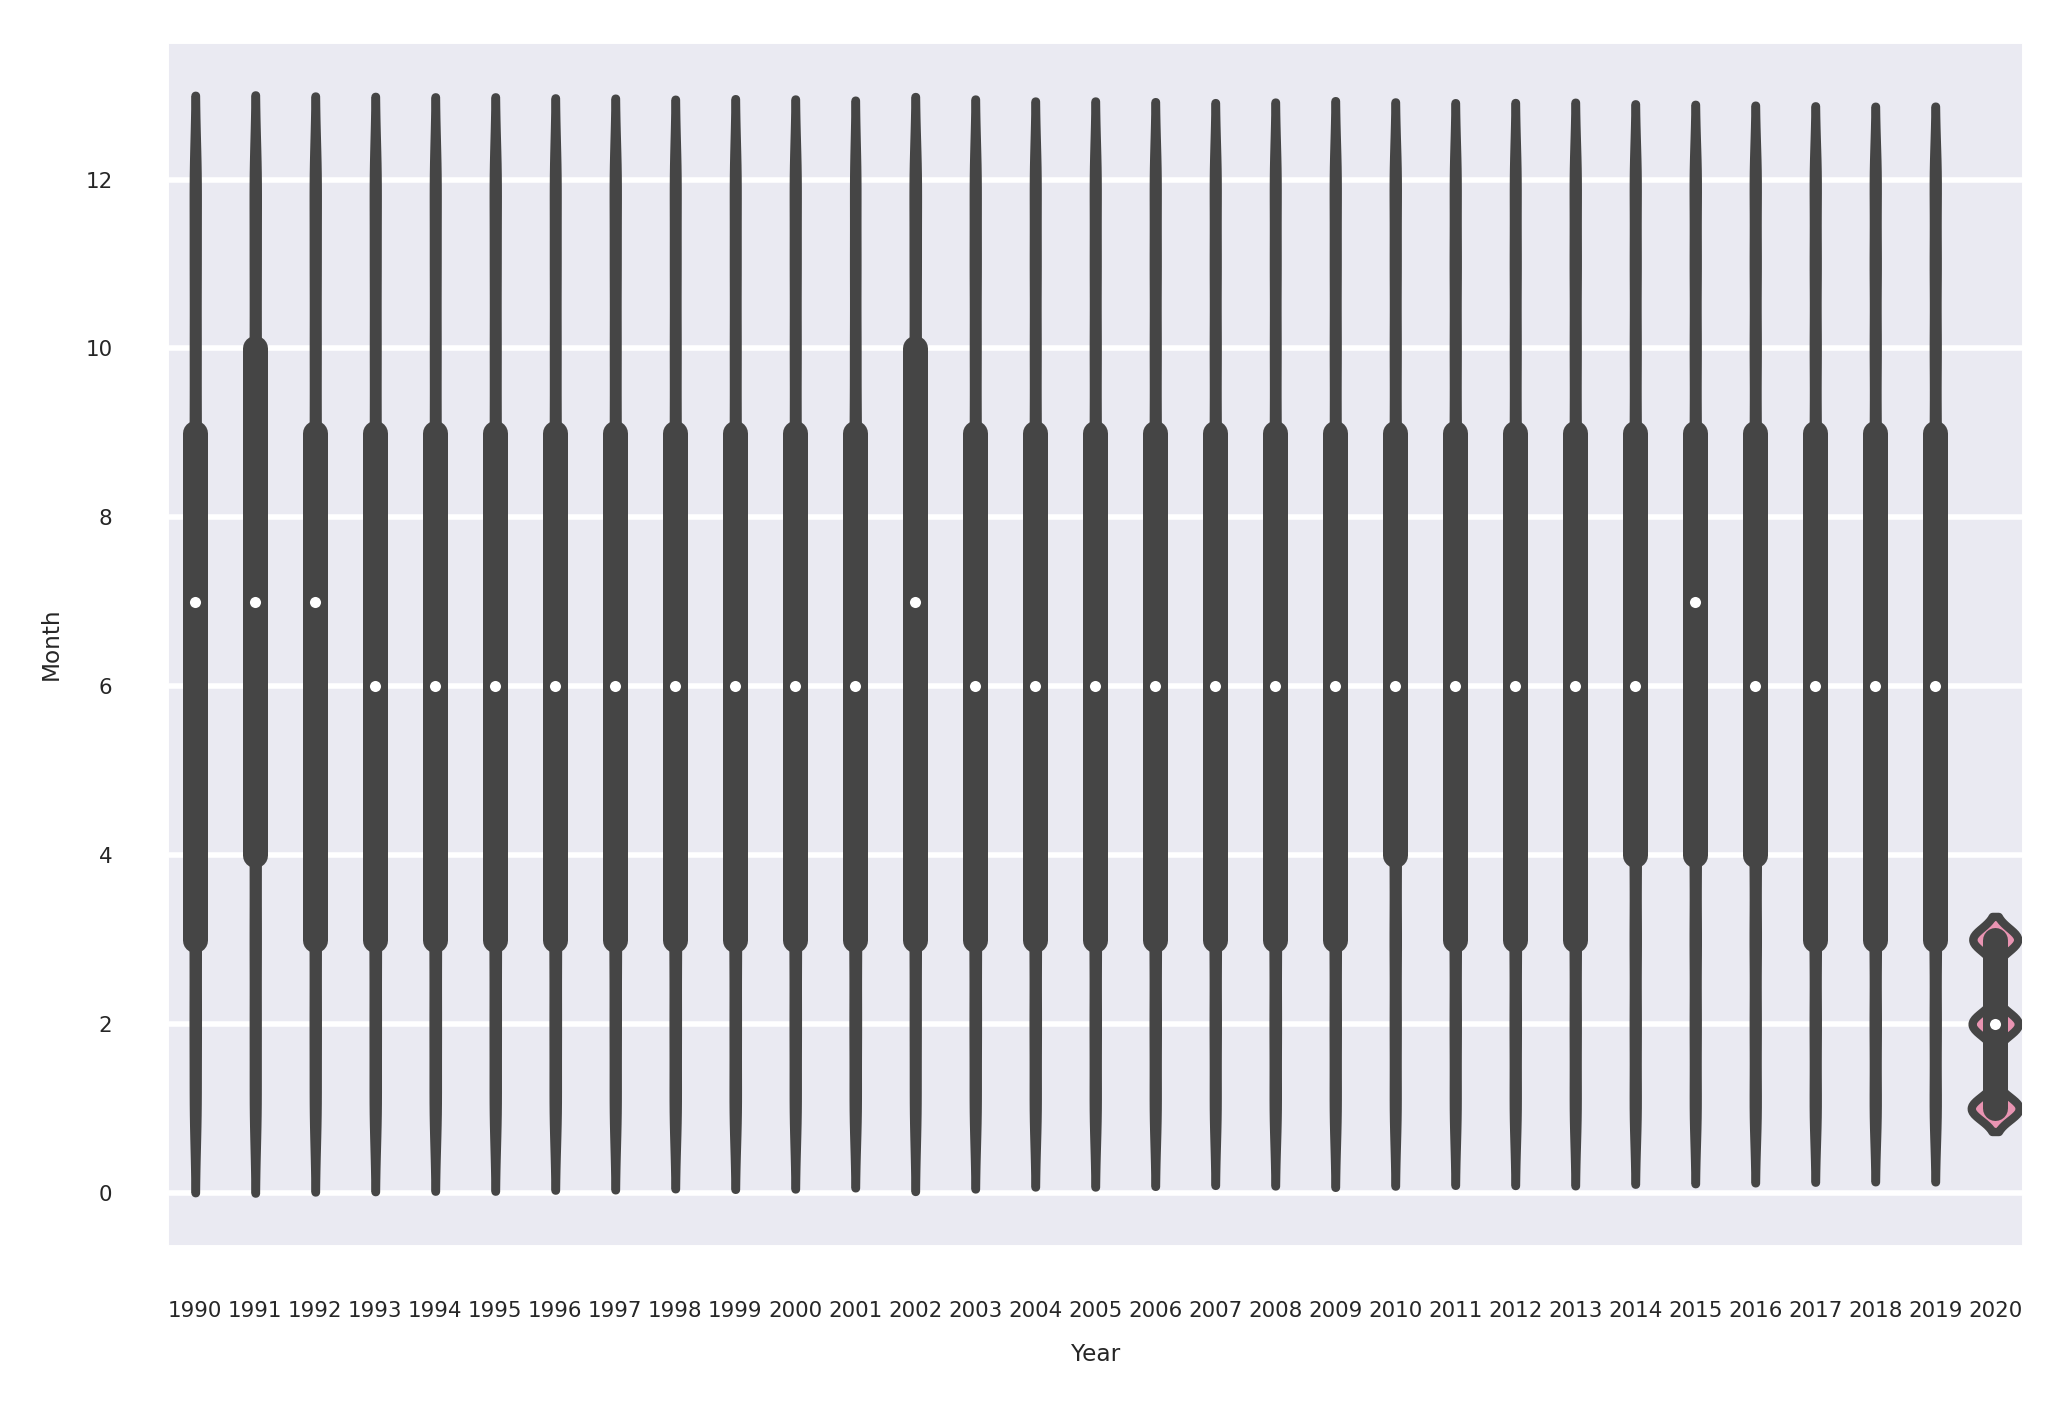

In [40]:
sns.violinplot(x='Year',y='Month',data=df_ps_fill)

The above violinplot shows the maximum passengers travelled per month per year.

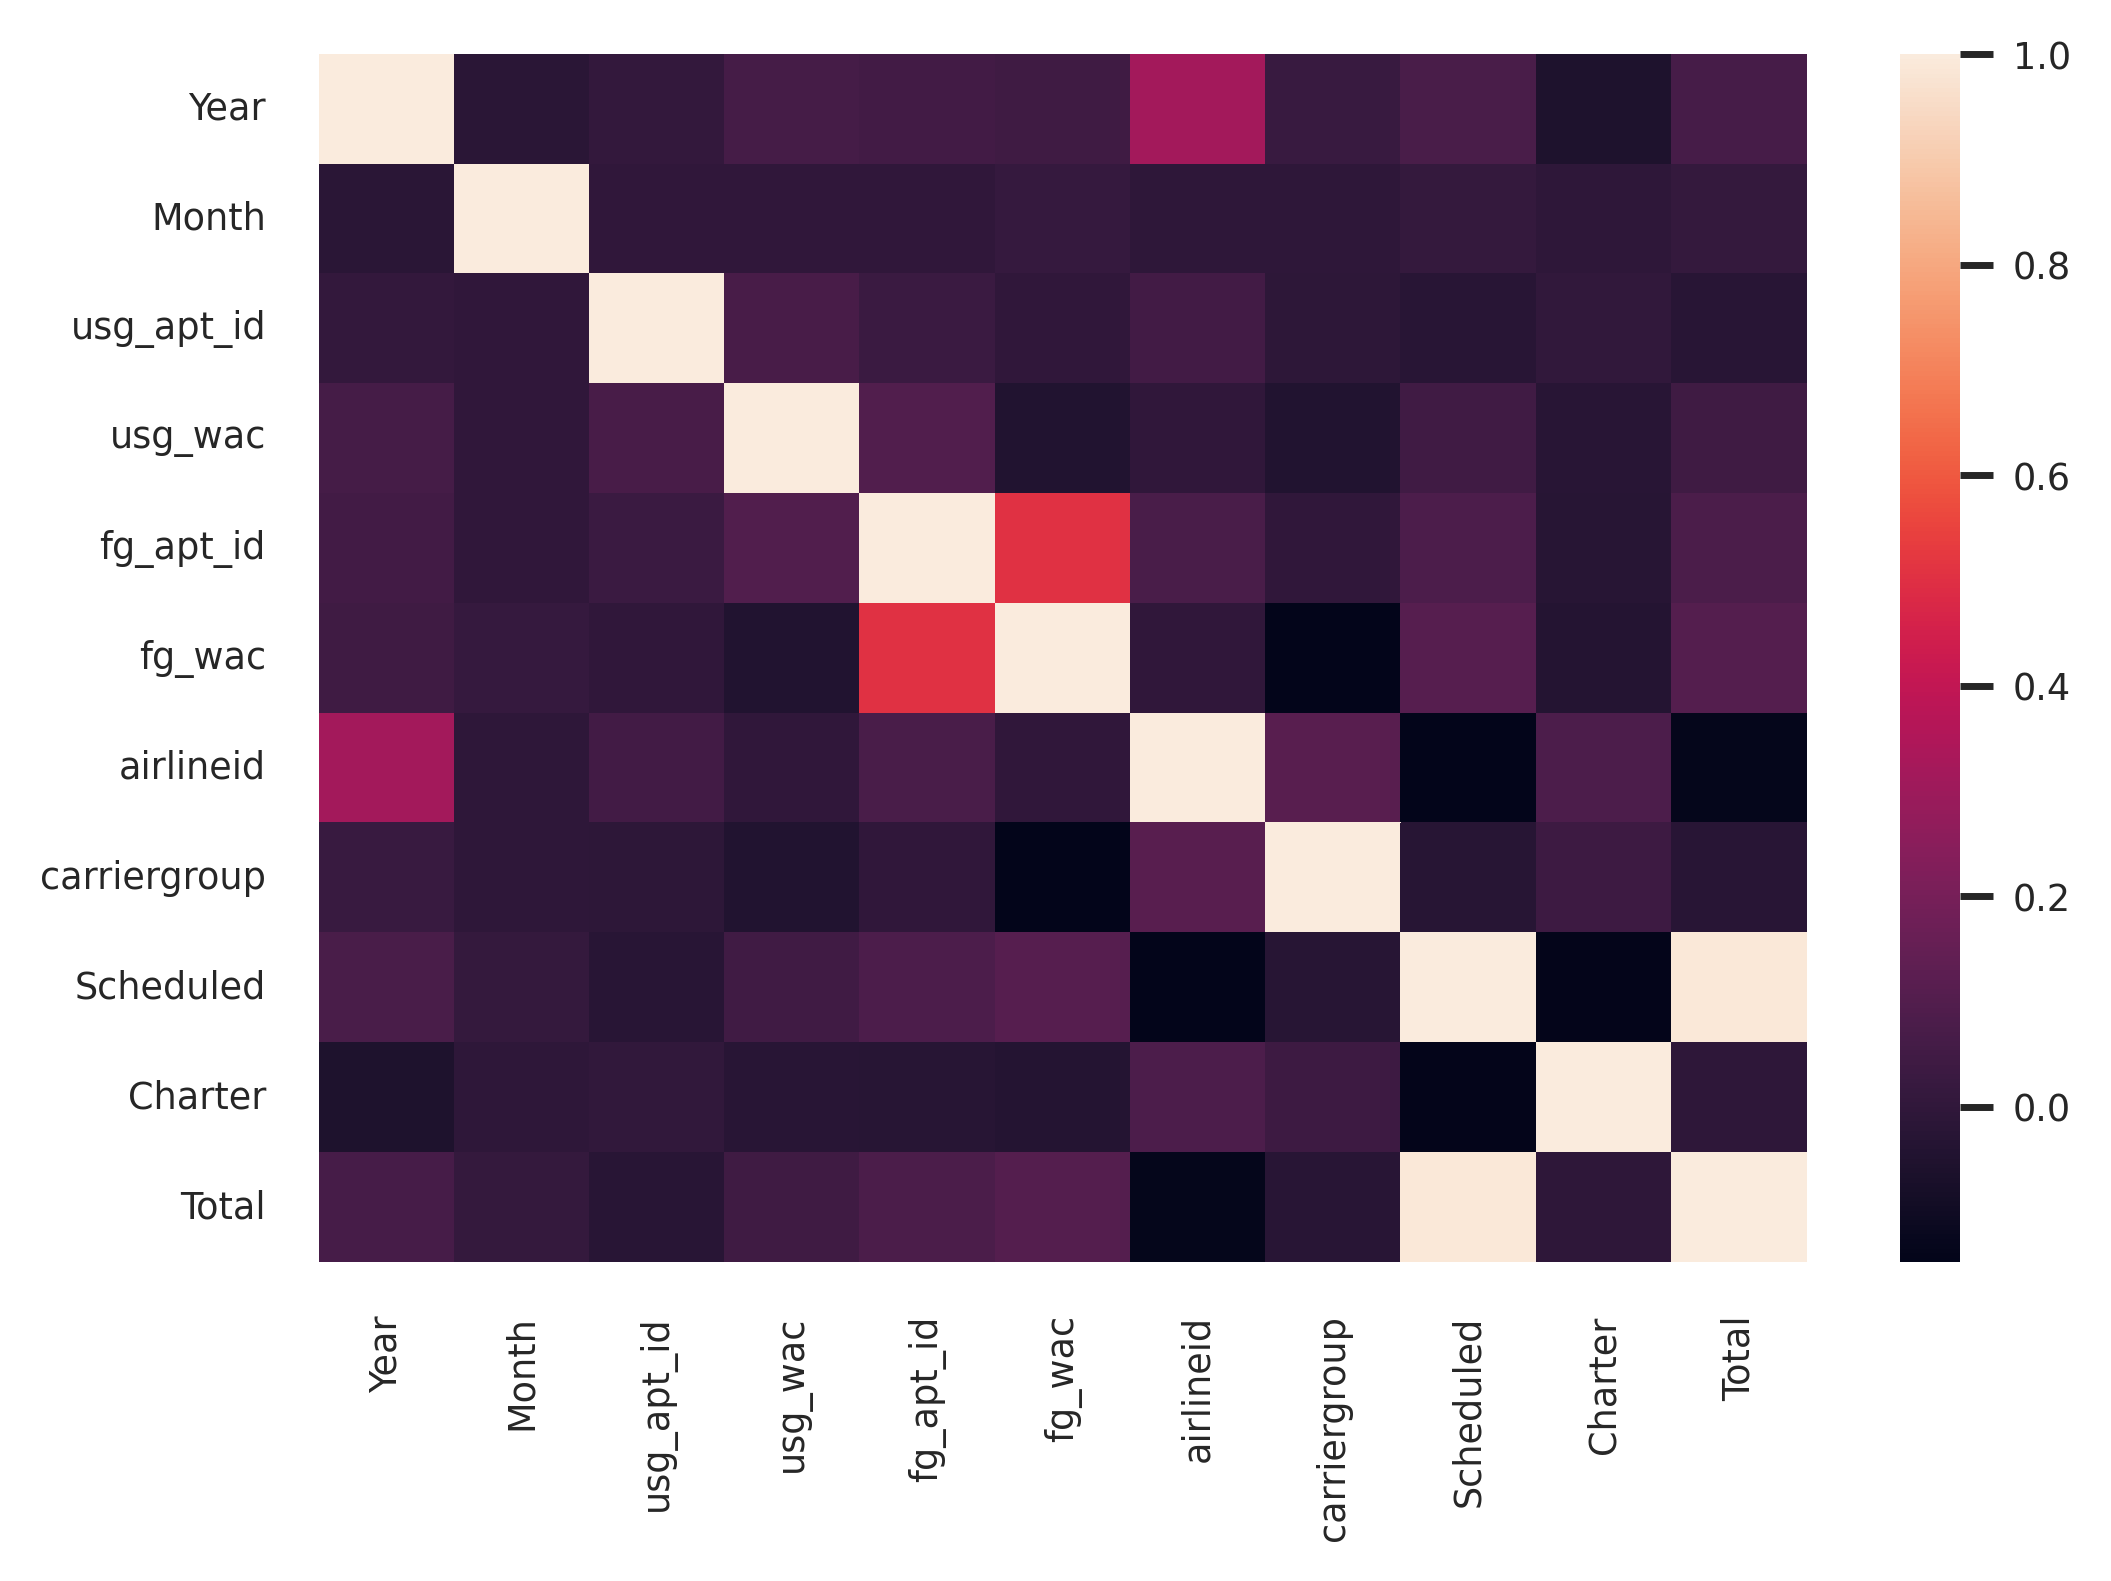

In [41]:
sns.set(font_scale=0.6)
corr_mrx=df_dp_fill.corr()
sns.heatmap(corr_mrx)

from the above correlation matrix it can be seen that fg_apt_id is highly correlated to fg_wac

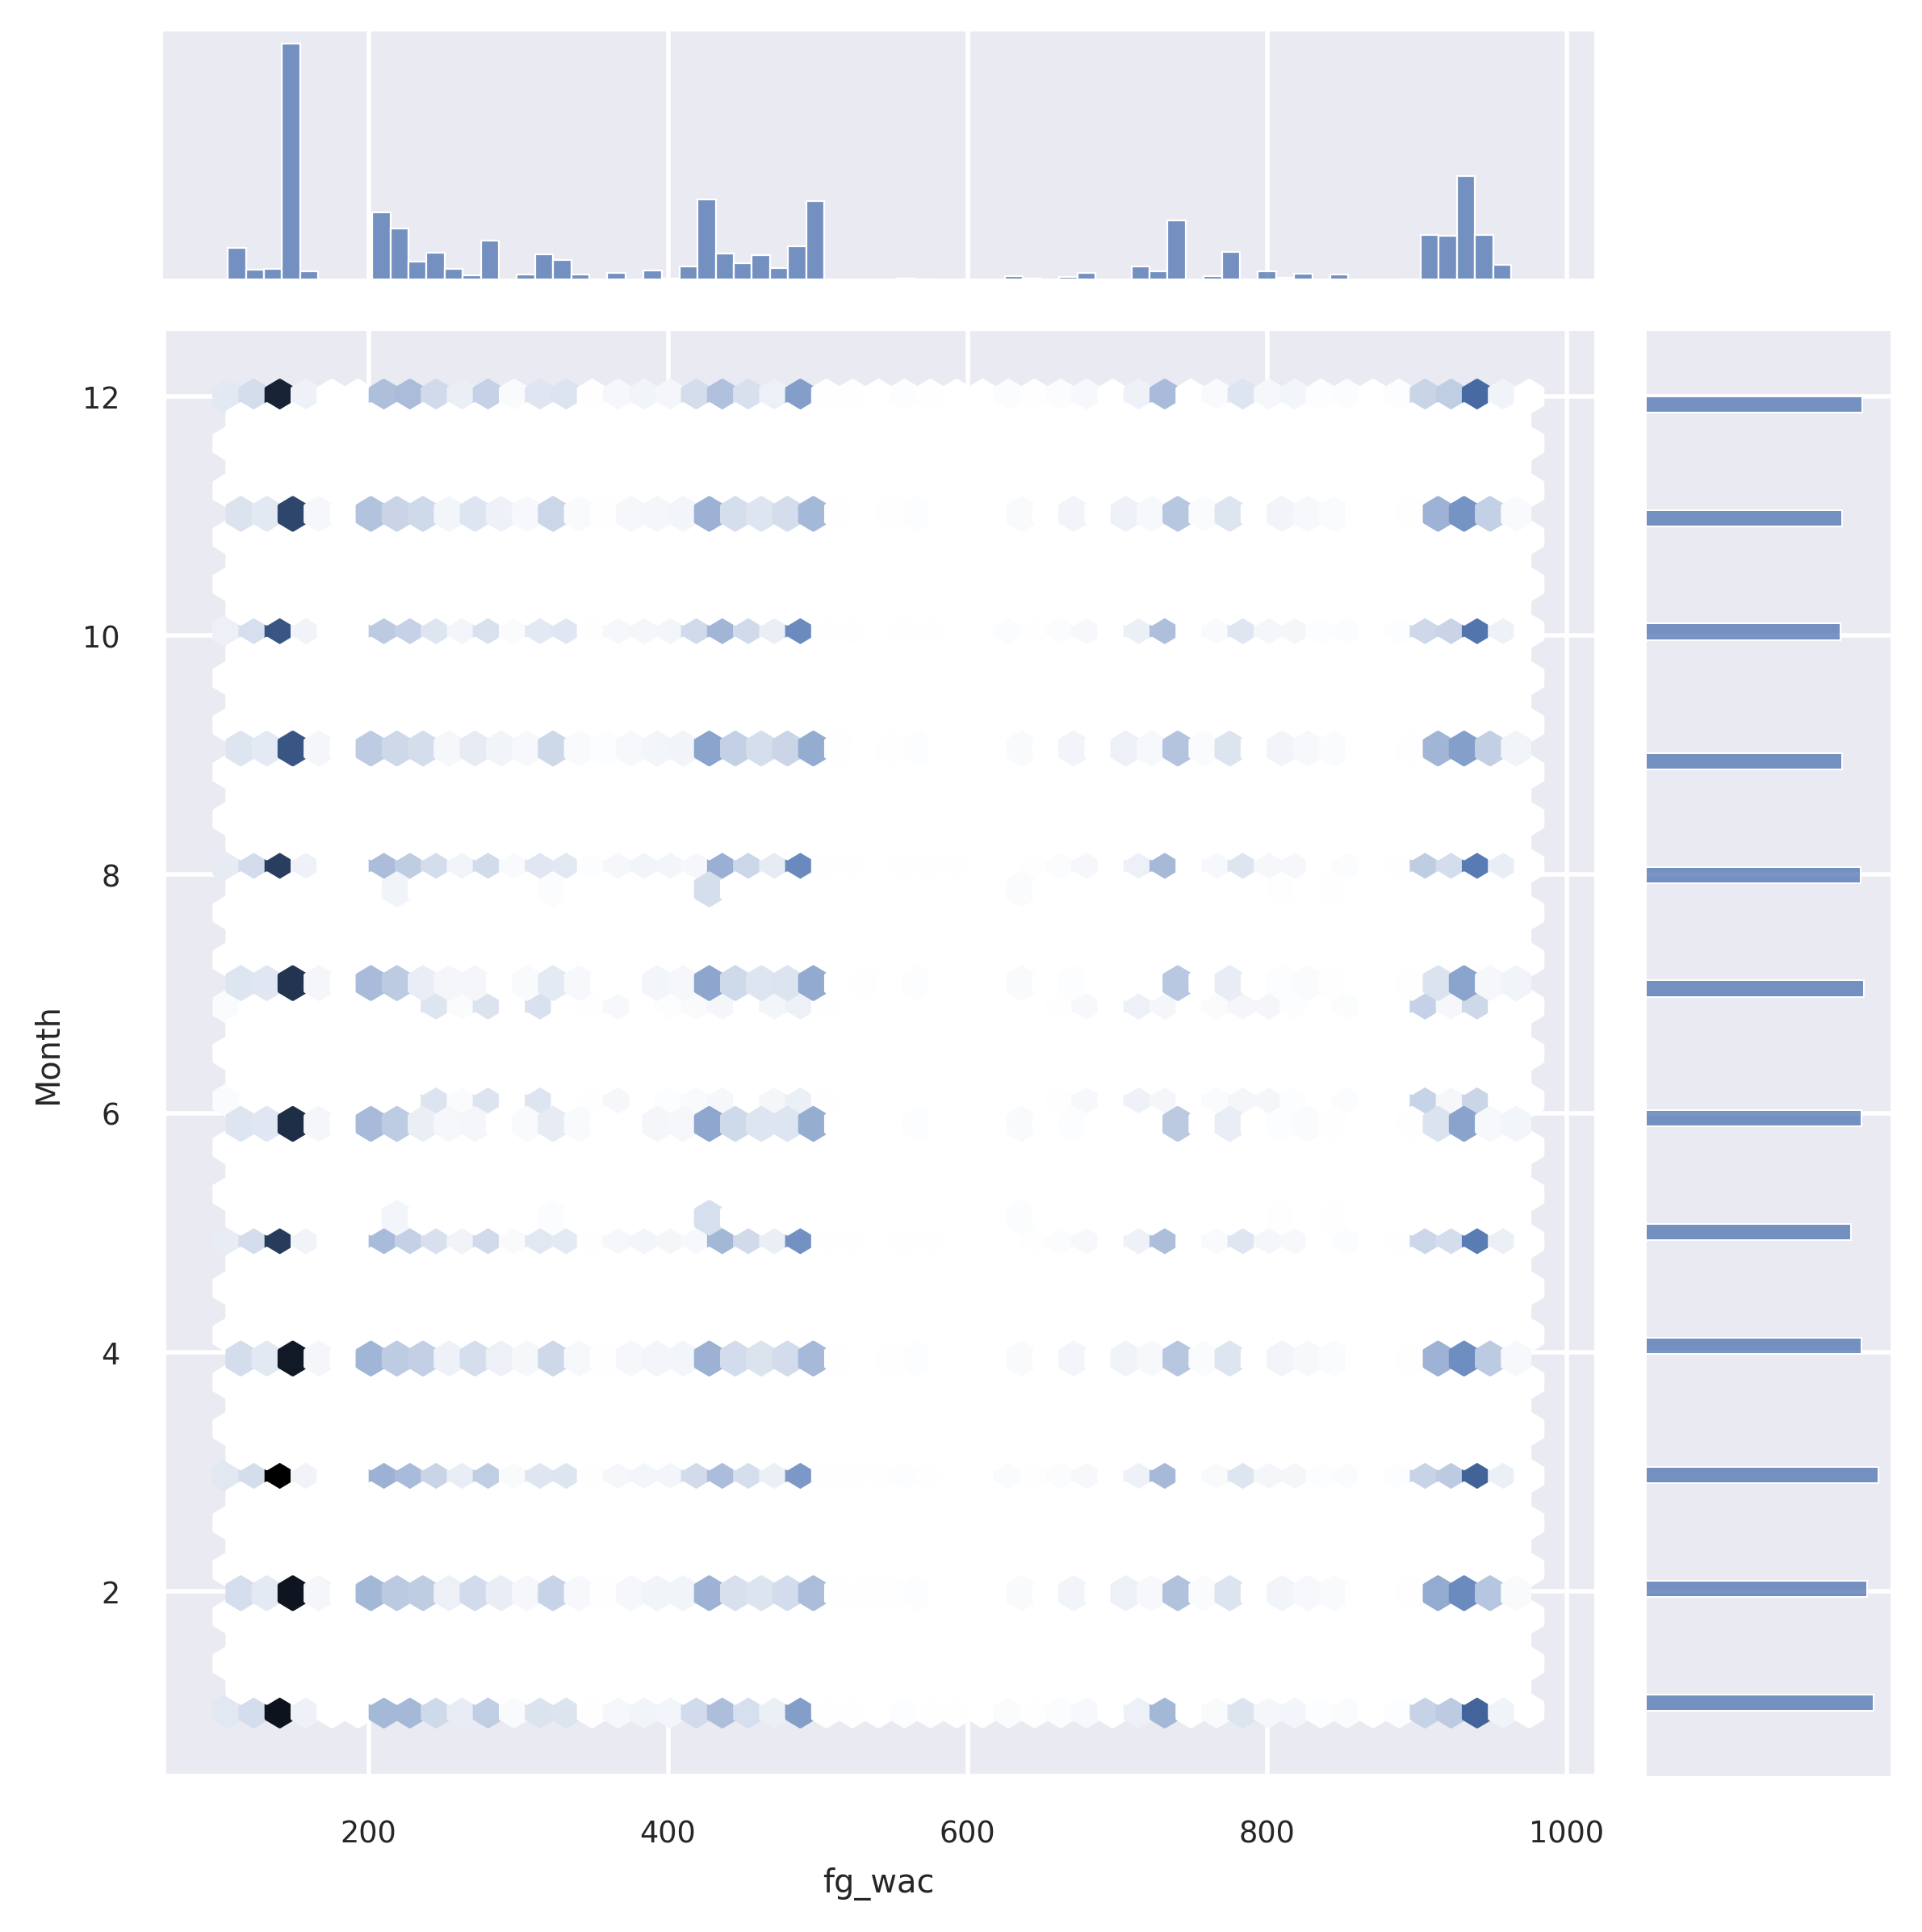

In [42]:
sns.jointplot(x='fg_wac',y='Month',kind='hex',data=df_ps_fill)